In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH = 'c:\\Users\\calvin\\Documents\\GitHub\\springboard\\champions_league_luck'

In [3]:
m = pd.read_csv(PATH+"/data/processed/matchups.csv", parse_dates=['date_g1', 'date_g2'])

dtypes = {'rnd':'category', 'day':'category', 'season': 'category',
         'h_team': 'category', 'h_country': 'category', 'a_team': 'category', 
         'a_country': 'category'}
games = pd.read_csv(PATH+"/data/processed/games.csv", dtype=dtypes, parse_dates=['date'], index_col=0)


In [4]:
# finals don't have a real home or away
no_finals = games[games['rnd'] != 'final']

# It appears that the Home team score many more goals than the away team.
homegoals = no_finals['h_score'].sum()
awaygoals = no_finals['a_score'].sum()
print(homegoals, awaygoals)
homegoals / (homegoals + awaygoals)

4226 2969


0.5873523280055594

In [5]:
# even for only more close matchups (less then 1 std of abs coefdiff), it's harder to score the 
close_matchup = no_finals.coefdiff.abs() < no_finals.coefdiff.abs().std()
homegoals = no_finals[close_matchup]['h_score'].sum()
awaygoals = no_finals[close_matchup]['a_score'].sum()
print(homegoals, awaygoals)
homegoals / (homegoals + awaygoals)

1617 1114


0.5920908092273892

In [6]:
goals = no_finals[['h_score', 'a_score']]
boots = []
for i in range(1000):
    boot = goals.sample(1000, replace=True)
    homegoals = boot['h_score'].sum()
    awaygoals = boot['a_score'].sum()
    boots.append(homegoals / (homegoals + awaygoals) )

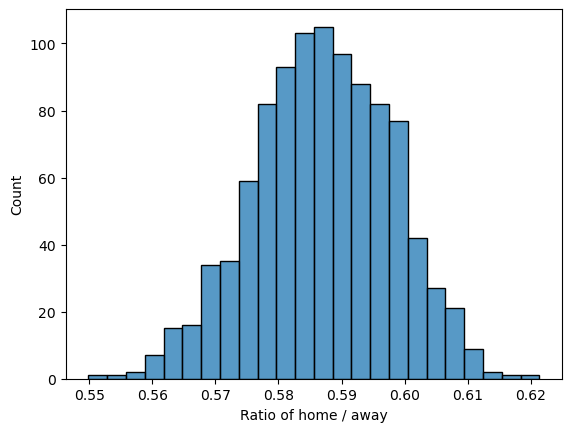

In [7]:
sns.histplot(x=boots)
plt.xlabel('Ratio of home / away')
plt.show()

In [8]:
# If we compare this to 0.5 as an evan amount of goals, it doesn't even fall into the plot
np_boots = np.array(boots)
(np_boots < .5).sum() / len(np_boots)

0.0

I think we can reject the null hypothesis that home and away goals are equally as frequent.

In [9]:
k_rnds = {'r16', 'quarters', 'semis'}
knockout = games[games.rnd.isin(k_rnds)]
knockout.shape

(508, 21)

In [10]:
# Need to drop the 2020's final knockout matchups because they were 1 games knockouts due to Covid-19
knockout = knockout.dropna()
knockout.shape

(502, 21)

In [11]:
# splitting on notes to get the legs
notes = knockout.notes.str.split(";", expand=True).rename({0: 'leg', 1: 'Note1', 2: 'Note2'}, axis=1)
knockout = pd.concat([knockout, notes], axis=1)

In [12]:
legs = knockout.groupby('leg')

In [13]:
legs.sum()

,wk,h_score,a_score,h_pens,a_pens,h_coef,a_coef,med_coef,coefdiff,goalstotal
leg,,,,,,,,,,
Leg 1 of 2,0,345,281,0,0,22503.7075,25530.8040,19514.795,-3027.0965,626
Leg 2 of 2,0,496,260,33,32,25530.8040,22503.7075,19514.795,3027.0965,756


In [14]:
legs.mean()

,wk,h_score,a_score,h_pens,a_pens,h_coef,a_coef,med_coef,coefdiff,goalstotal
leg,,,,,,,,,,
Leg 1 of 2,0.0,1.374502,1.119522,0.000000,0.00000,89.656205,101.716351,77.748187,-12.060145,2.494024
Leg 2 of 2,0.0,1.976096,1.035857,0.131474,0.12749,101.716351,89.656205,77.748187,12.060145,3.011952


In [15]:
m.columns

Index(['Unnamed: 0', 'season', 'rnd', 'date_g1', 'day_g1', 'notes_g1', 'wk_g1',
       'h_team_g1', 'h_country_g1', 'h_score_g1', 'a_team_g1', 'a_country_g1',
       'a_score_g1', 'h_pens_g1', 'a_pens_g1', 'h_coef_g1', 'a_coef_g1',
       'med_coef_g1', 'coefdiff_g1', 'goalstotal_g1', 'game_winner_g1',
       'teams', 'date_g2', 'day_g2', 'notes_g2', 'wk_g2', 'h_team_g2',
       'h_country_g2', 'h_score_g2', 'a_team_g2', 'a_country_g2', 'a_score_g2',
       'h_pens_g2', 'a_pens_g2', 'h_coef_g2', 'a_coef_g2', 'med_coef_g2',
       'coefdiff_g2', 'goalstotal_g2', 'game_winner_g2', 'team1_total',
       'team2_total', 'total_goals', 'win_cond', 'winner', 'loser'],
      dtype='object')

In [16]:
# Get all away goal matches
away = m[m.win_cond == 'away']
away.head()

,Unnamed: 0,season,rnd,date_g1,day_g1,notes_g1,wk_g1,h_team_g1,h_country_g1,h_score_g1,...,med_coef_g2,coefdiff_g2,goalstotal_g2,game_winner_g2,team1_total,team2_total,total_goals,win_cond,winner,loser
3,0,2000-2001,quarters,2001-04-04,Wed,Leg 1 of 2,0,Arsenal,eng,2,...,53.963,17.072,1,Valencia,2,2,4,away,Valencia,Arsenal
10,0,2001-2002,semis,2002-04-24,Wed,Leg 1 of 2,0,Manchester Utd,eng,2,...,68.137,-54.328,2,tie,3,3,6,away,Leverkusen,Manchester Utd
15,0,2002-2003,quarters,2003-04-09,Wed,Leg 1 of 2,0,Inter,it,1,...,73.495,32.738,3,Valencia,2,2,4,away,Inter,Valencia
16,0,2002-2003,semis,2003-05-07,Wed,Leg 1 of 2,0,Milan,it,0,...,73.495,4.161,2,tie,1,1,2,away,Milan,Inter
21,0,2003-2004,quarters,2004-03-24,Wed,Leg 1 of 2,0,Real Madrid,es,4,...,60.749,-106.035,4,Monaco,5,5,10,away,Monaco,Real Madrid


In [17]:
away[['goalstotal_g1', 'goalstotal_g2']].describe()

,goalstotal_g1,goalstotal_g2
count,33.000000,33.000000
mean,2.969697,2.727273
std,1.793824,1.625437
min,0.000000,0.000000
25%,1.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,8.000000,7.000000


 So the game 1 totals are slightly higher, but not by much. 

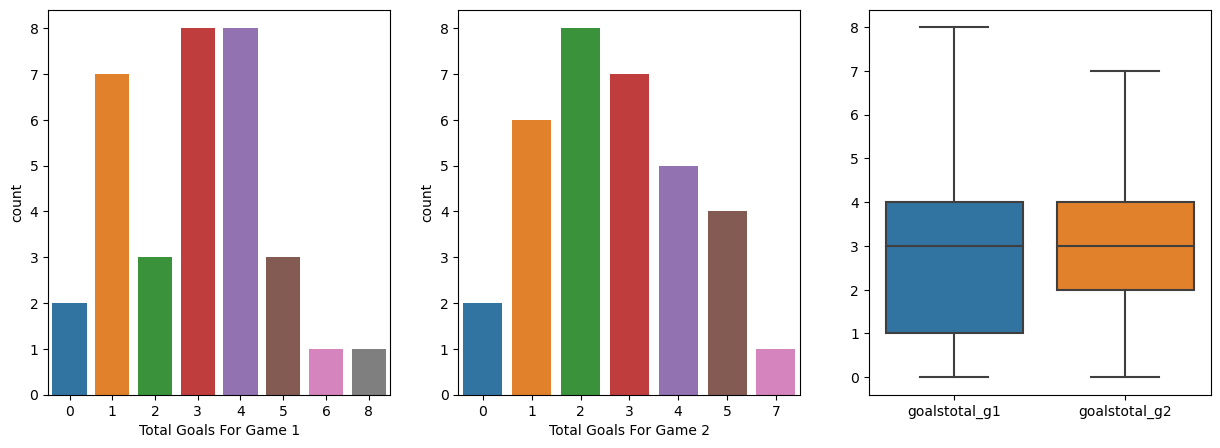

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='goalstotal_g1', data=away, ax=axs[0])
axs[0].set(xlabel='Total Goals For Game 1')
sns.countplot(x='goalstotal_g2', data=away, ax=axs[1])
axs[1].set(xlabel='Total Goals For Game 2')
sns.boxplot(data=away[['goalstotal_g1', 'goalstotal_g2']], ax=axs[2])
plt.show()

# Let's look at the whole dataset.

In [19]:
m[['goalstotal_g1', 'goalstotal_g2']].describe()


,goalstotal_g1,goalstotal_g2
count,251.000000,251.000000
mean,2.494024,3.011952
std,1.650141,1.892051
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,4.000000,4.000000
max,8.000000,9.000000


In [20]:
m[['goalstotal_g1', 'goalstotal_g2']].median()

goalstotal_g1    2.0
goalstotal_g2    3.0
dtype: float64

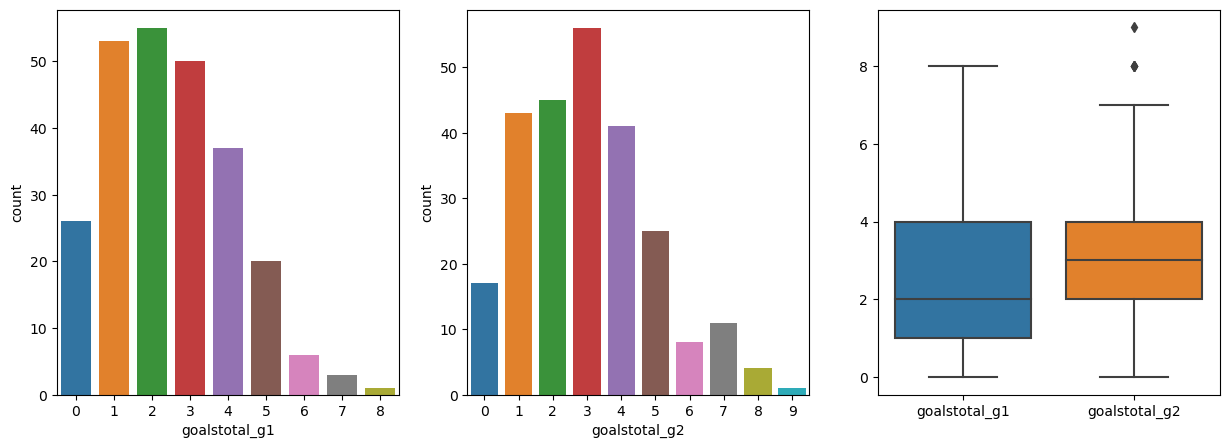

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='goalstotal_g1', data=m, ax=axs[0])
sns.countplot(x='goalstotal_g2', data=m, ax=axs[1])
sns.boxplot(data=m[['goalstotal_g1', 'goalstotal_g2']], ax=axs[2])
plt.show()

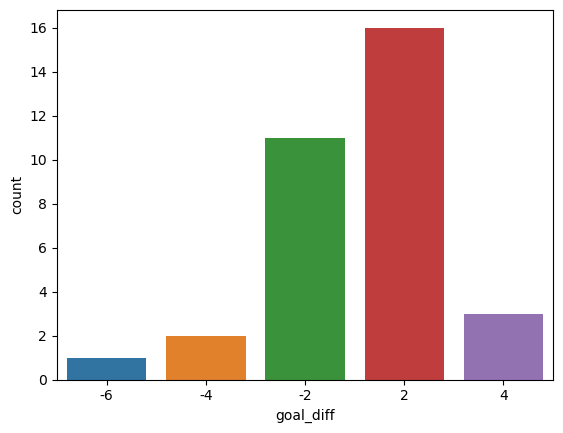

In [22]:
goal_diff = pd.DataFrame((away.goalstotal_g1 - away.goalstotal_g2), columns=['goal_diff'])
sns.countplot(x='goal_diff', data=goal_diff)
plt.show()

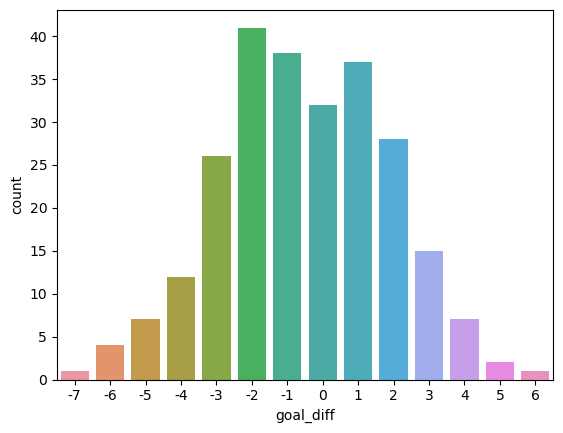

In [23]:
goal_diff = pd.DataFrame((m.goalstotal_g1 - m.goalstotal_g2), columns=['goal_diff'])
sns.countplot(x='goal_diff', data=goal_diff)
plt.show()

In [24]:
# Let's see what the chances of winner the first game and the 

m.columns

Index(['Unnamed: 0', 'season', 'rnd', 'date_g1', 'day_g1', 'notes_g1', 'wk_g1',
       'h_team_g1', 'h_country_g1', 'h_score_g1', 'a_team_g1', 'a_country_g1',
       'a_score_g1', 'h_pens_g1', 'a_pens_g1', 'h_coef_g1', 'a_coef_g1',
       'med_coef_g1', 'coefdiff_g1', 'goalstotal_g1', 'game_winner_g1',
       'teams', 'date_g2', 'day_g2', 'notes_g2', 'wk_g2', 'h_team_g2',
       'h_country_g2', 'h_score_g2', 'a_team_g2', 'a_country_g2', 'a_score_g2',
       'h_pens_g2', 'a_pens_g2', 'h_coef_g2', 'a_coef_g2', 'med_coef_g2',
       'coefdiff_g2', 'goalstotal_g2', 'game_winner_g2', 'team1_total',
       'team2_total', 'total_goals', 'win_cond', 'winner', 'loser'],
      dtype='object')

In [25]:

# conds = {
#     'g1w': m.game_winner_g1 == m.winner,
#     'g2w': m.game_winner_game2 == m.winner,
#     'g1w_g2w': (m.game_winner_g1 == m.winner) & (m.game_winner_game2 == m.winner),
#     'g1l_g2l': (m.game_winner_g1 == m.loser) & (m.game_winner_game2 == m.loser),
#     'g1w_g2l': (m.game_winner_g1 == m.winner) & (m.game_winner_game2 == m.loser),
#     'g1w_g2t': (m.game_winner_g1 == m.winner) & (m.game_winner_game2 == 'tie'),
#     'g1l_g2w': (m.game_winner_g1 == m.loser) & (m.game_winner_game2 == m.winner),
#     'g1t_g2w': (m.game_winner_g1 == 'tie') & (m.game_winner_game2 == m.winner),
# }

In [26]:
# for k, v in conds.items():
#     print(f"{k}: {len(m[v])}, {len(m[v])/len(v)}")

In [27]:
g1w_l = (m.game_winner_g1 != m.winner).sum()
g1w_w = (m.game_winner_g1 == m.winner).sum()

In [28]:
g1w_w / (g1w_l + g1w_w)

0.5418326693227091

In [29]:
g1w = m[m.game_winner_g1 == m.winner]
g1l = m[m.game_winner_g1 != m.winner]

In [30]:
g1w_w_noaway = len(g1w[g1w.win_cond != 'away'])

In [31]:
g1w_w_noaway / (g1w_l + g1w_w_noaway)

0.5208333333333334

In [32]:
with_away = []
no_away = []
for i in range(1000):
    boot = m.sample(1000, replace=True)
    g1w_l = (boot.game_winner_g1 != boot.winner).sum()
    g1w_w = (boot.game_winner_g1 == boot.winner).sum()
    g1w = boot[boot.game_winner_g1 == boot.winner]
    g1w_w_noaway = len(g1w[g1w.win_cond != 'away'])
    with_away.append(g1w_w / (g1w_l + g1w_w))
    no_away.append(g1w_w_noaway / (g1w_l + g1w_w_noaway))

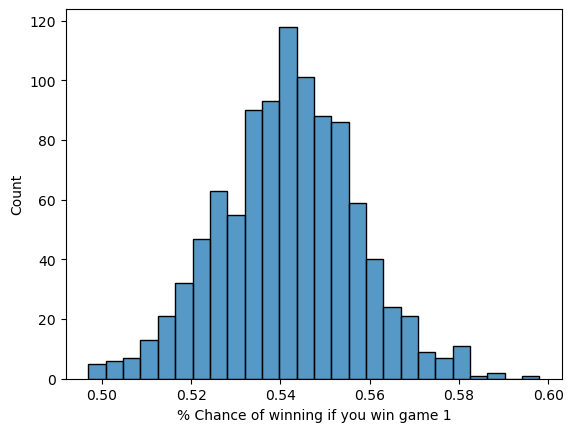

In [33]:
sns.histplot(x=with_away)
plt.xlabel('% Chance of winning if you win game 1')
plt.show()

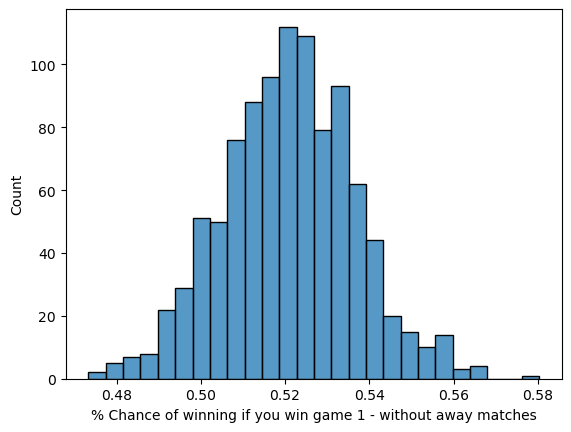

In [34]:
sns.histplot(x=no_away)
plt.xlabel('% Chance of winning if you win game 1 - without away matches')
plt.show()

# High Scoring games - Home or Away

## I don't know what a high scoring game would be exactly. I've watched a lot of soccer matches. I'd say over 3-4 is probably high scoring.
## To do it more precisely, let's find the median goals scored in a game for the champions league.

In [35]:
games.goalstotal.describe()

count    2628.000000
mean        2.759893
std         1.718204
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: goalstotal, dtype: float64

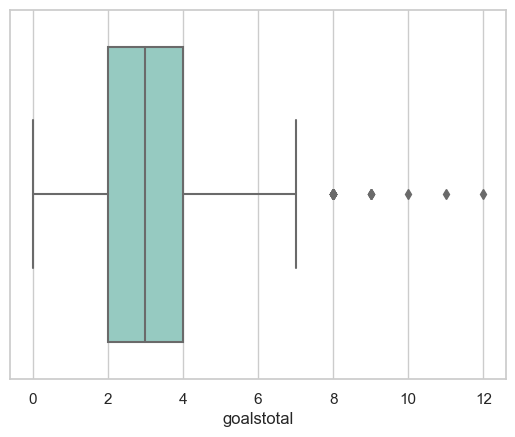

In [36]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=games.goalstotal, palette='Set3')
plt.show()

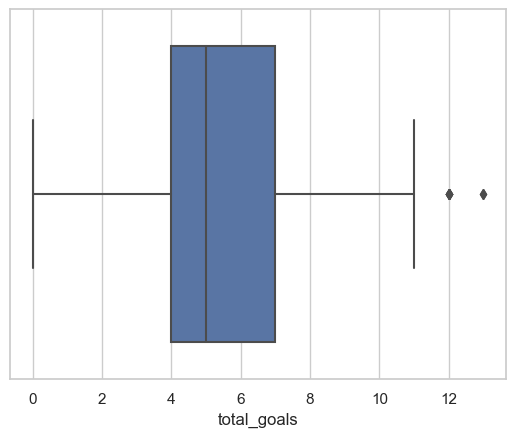

In [37]:
sns.boxplot(x=m.total_goals);
plt.show()

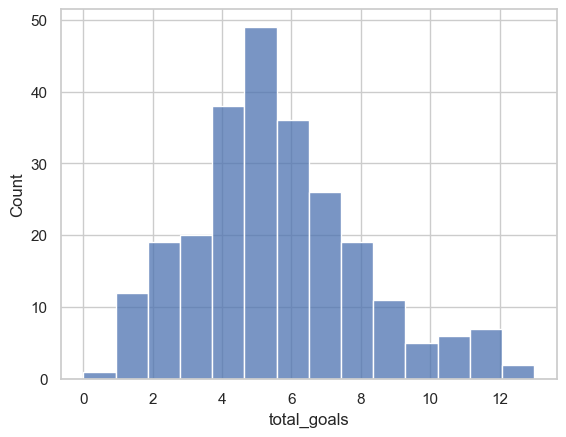

In [38]:
sns.histplot(x=m.total_goals);
plt.show()

## I want to find when home or away has a high score

In [39]:
# g1high = m[m.goalstotal_g1 > 3]
# g2high = m[m.goalstotal_g2 > 3]
g1high_or_low = pd.Series(
                    np.where(m.goalstotal_g1 > 3, 'g1high', 'no_g1high')
                    )
g2high_or_low = pd.Series(
                    np.where(m.goalstotal_g2 > 3, 'g2high', 'no_g2high')
                    )

In [40]:
# g1high = away[away.goalstotal_g1 > 3]
# g2high = away[away.goalstotal_g2 > 3]
away_g1high_or_low = pd.Series(
                    np.where(away.goalstotal_g1 > 3, 'g1high', 'no_g1high')
                    )
away_g2high_or_low = pd.Series(
                    np.where(away.goalstotal_g2 > 3, 'g2high', 'no_g2high')
                    )

In [41]:
away_g1high_or_low.value_counts(), away_g1high_or_low.value_counts(normalize=True)

(no_g1high    20
 g1high       13
 dtype: int64,
 no_g1high    0.606061
 g1high       0.393939
 dtype: float64)

In [42]:
away_g2high_or_low.value_counts(), away_g2high_or_low.value_counts(normalize=True)

(no_g2high    23
 g2high       10
 dtype: int64,
 no_g2high    0.69697
 g2high       0.30303
 dtype: float64)

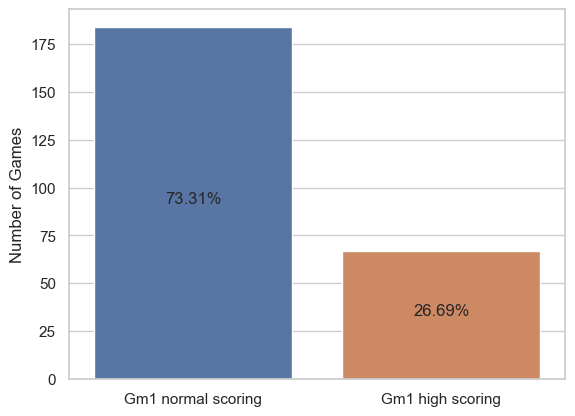

In [43]:
percent = round(g1high_or_low.value_counts(normalize=True) * 100, 2)
ax = sns.countplot(x=g1high_or_low)
ax.set_ylabel('Number of Games')
ax.set_xticks(range(2))
ax.set_xticklabels(['Gm1 normal scoring', 'Gm1 high scoring'])
for i in range(len(ax.patches)):
    x = ax.patches[i].get_x() + ax.patches[i].get_width()/2
    y = ax.patches[i].get_height()/2
    ax.annotate(f"{percent[i]}%", (x, y), ha='center')
plt.show();

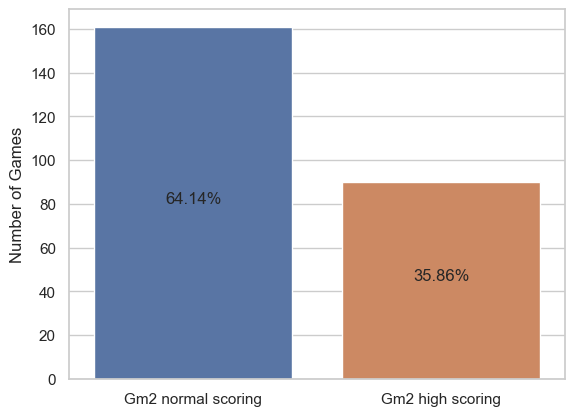

In [44]:
percent = round(g2high_or_low.value_counts(normalize=True) * 100, 2)
ax = sns.countplot(x=g2high_or_low)
ax.set_ylabel('Number of Games')
ax.set_xticks(range(2))
ax.set_xticklabels(['Gm2 normal scoring', 'Gm2 high scoring'])
for i in range(len(ax.patches)):
    x = ax.patches[i].get_x() + ax.patches[i].get_width()/2
    y = ax.patches[i].get_height()/2
    ax.annotate(f"{percent[i]}%", (x, y), ha='center')
plt.show();

# Total Goals

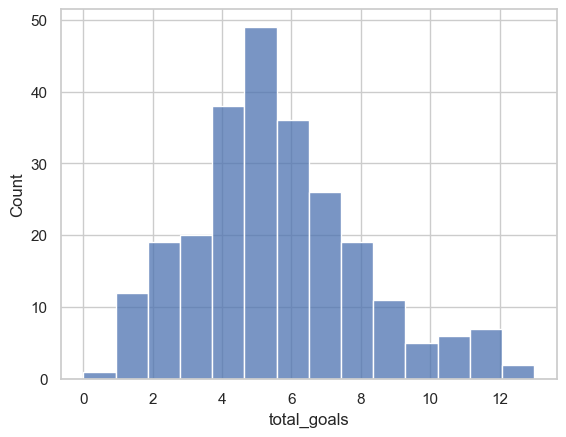

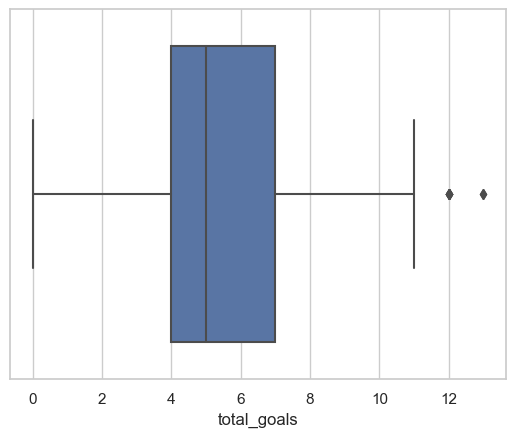

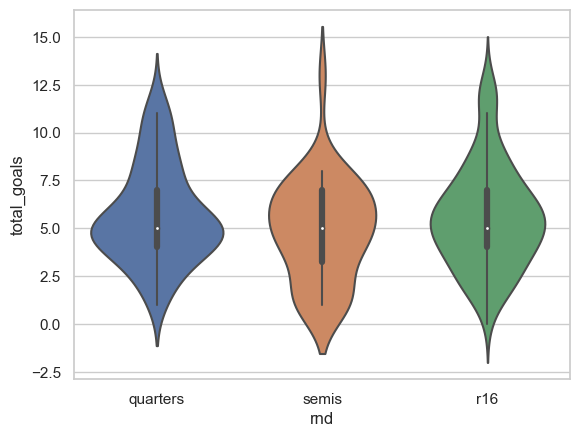

In [45]:
# looking at the distribution of total goals and if there is much of a difference per round.
# the semis are a little more likely to be low scoring
sns.histplot(x=m.total_goals);
plt.show()
sns.boxplot(x=m.total_goals);
plt.show()
sns.violinplot(x='rnd', y='total_goals', data=m);
plt.show()

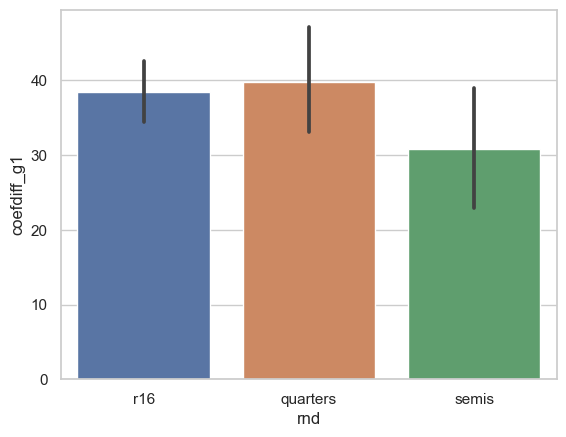

In [46]:
# there is a clear difference in the coef difference between the first two knockout rounds and the semis. 
# It would make more sense that the violin plot above shows the semis have closer games.
sns.barplot(x='rnd', y=abs(m.coefdiff_g1), data=m, order=['r16', 'quarters', 'semis'])
plt.show()

# What defines a close game?

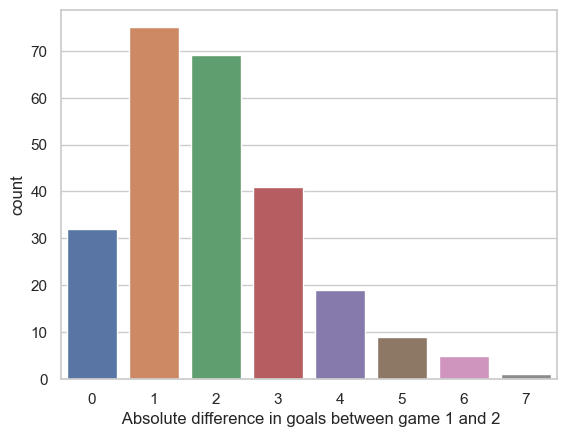

In [47]:
sns.countplot(x=abs(m.goalstotal_g1 - m.goalstotal_g2));
plt.xlabel(' Absolute difference in goals between game 1 and 2')
plt.show()

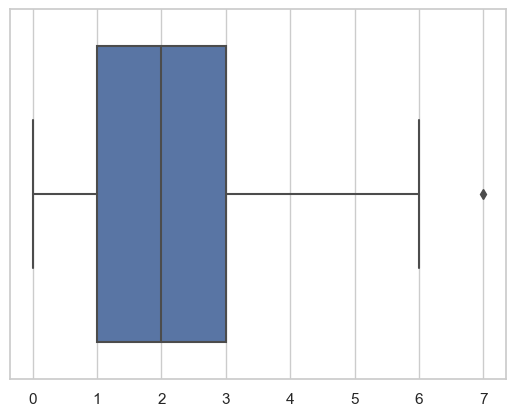

In [48]:
# I would say that any game with a total goal difference over 3 is good given that it would be within the 4th quartile
sns.boxplot(x=abs(m.goalstotal_g1 - m.goalstotal_g2))
plt.show()

In [49]:
# total number of uneven matchups and percent of all matchups

(abs(m.goalstotal_g1 - m.goalstotal_g2) > 3).sum(), (abs(m.goalstotal_g1 - m.goalstotal_g2) > 3).sum() / len(m)

(34, 0.13545816733067728)

In [50]:
m[['win_cond']][abs(m.goalstotal_g1 - m.goalstotal_g2) > 3].value_counts()

win_cond
total       28
away         6
dtype: int64

In [51]:
# 17% of matchups that are uneven in total goals from g1 to g2 are won by away goal rule
# This is important because my idea was that g1 and g2 are more independent than generally believed
m[['win_cond']][abs(m.goalstotal_g1 - m.goalstotal_g2) > 3].value_counts(normalize=True)

win_cond
total       0.823529
away        0.176471
dtype: float64

In [52]:
# let's check 17% against away goals rules in all matchups
# it's slightly higher than the whole population 
m[['win_cond']].value_counts(normalize=True)

win_cond
total       0.832669
away        0.131474
pens        0.035857
dtype: float64

In [53]:
# How many does the home team of the high scoring game lose?
m['win_cond'][((m.goalstotal_g1 - m.goalstotal_g2) > 3 ) & 
    (m.h_team_g1 == m.loser)].value_counts()


total    6
away     3
Name: win_cond, dtype: int64

In [54]:
m['win_cond'][((m.goalstotal_g1 - m.goalstotal_g2) < -3 ) & 
    (m.h_team_g2 == m.loser)].value_counts()

away     3
total    3
Name: win_cond, dtype: int64

In [55]:
m['coefdiff_g1'][((m.goalstotal_g1 - m.goalstotal_g2) > 3 ) & 
    (m.h_team_g1 == m.loser)].abs().median()

44.339

## It appears there isn't much of a connection in away goal rules and uneven g1 score and g2 scores.


In [56]:
m.columns

Index(['Unnamed: 0', 'season', 'rnd', 'date_g1', 'day_g1', 'notes_g1', 'wk_g1',
       'h_team_g1', 'h_country_g1', 'h_score_g1', 'a_team_g1', 'a_country_g1',
       'a_score_g1', 'h_pens_g1', 'a_pens_g1', 'h_coef_g1', 'a_coef_g1',
       'med_coef_g1', 'coefdiff_g1', 'goalstotal_g1', 'game_winner_g1',
       'teams', 'date_g2', 'day_g2', 'notes_g2', 'wk_g2', 'h_team_g2',
       'h_country_g2', 'h_score_g2', 'a_team_g2', 'a_country_g2', 'a_score_g2',
       'h_pens_g2', 'a_pens_g2', 'h_coef_g2', 'a_coef_g2', 'med_coef_g2',
       'coefdiff_g2', 'goalstotal_g2', 'game_winner_g2', 'team1_total',
       'team2_total', 'total_goals', 'win_cond', 'winner', 'loser'],
      dtype='object')

In [57]:

# print(m[(high_scoring_g1) & (m.h_team_g1 == m.game_winner_g1)]['win_cond'].value_counts())
# print(m[(high_scoring_g1) & (m.h_team_g1 == m.game_winner_g1)]['win_cond'].value_counts(normalize=True))
# print(m[(high_scoring_g1) & (m.h_team_g1 == m.game_winner_g1) & (m.h_team_g1 == m.loser)]['win_cond'].value_counts())
# print(m[(high_scoring_g1) & (m.h_team_g1 == m.game_winner_g1) & (m.h_team_g1 == m.loser)]['win_cond'].value_counts(normalize=True))

In [58]:
def custom_combos(df: pd.DataFrame):
    
    high_scoring_g1 = df.goalstotal_g1 > 3

    print('Gm1 Home team wins or loses matchup',
        df[df.h_team_g1 != df.loser]['win_cond'].count(),
        df[df.h_team_g1 == df.loser]['win_cond'].count()
    )

    print('Gm1 Home team Coef is greater or less than the away team',
        np.sum(df.h_coef_g1 > df.a_coef_g1), 
        np.sum(df.h_coef_g1 < df.a_coef_g1)
    )

    temp_df = pd.DataFrame()
    temp_df['Game 1 Home Winner'] = np.select([df.h_team_g1 != df.loser, df.h_team_g1 == df.loser], ['winner', 'loser'])
    temp_df['Game 1 Home Higher Coef'] = np.select([df.h_coef_g1 > df.a_coef_g1, df.h_coef_g1 < df.a_coef_g1], ['Higher', 'Lower'], 'equal')
    sns.set()
    temp_df[['Game 1 Home Winner']].value_counts().plot(kind='pie')
    plt.ylabel('')
    plt.title('Game 1 Home Team - Matchup Result')
    plt.show()
    temp_df[['Game 1 Home Higher Coef']].value_counts().plot(kind='pie')
    plt.title('Game 1 Home Team - Coef Compared to Opponent')
    plt.ylabel('')
    plt.show()

    print( 'High scoring Gm1, Gm1 Home team loses matchup',
        df[(high_scoring_g1) & (df.h_team_g1 != df.loser)]['win_cond'].count(),
        df[(high_scoring_g1) & (df.h_team_g1 == df.loser)]['win_cond'].count()
    )

    # High scoring Gm1, Gm1 Home team loses or wins matchup, only for closer matchups because many are just a big club thumping a little club
    close_matchup = df.coefdiff_g1.abs() < df.coefdiff_g1.abs().std()
    print( 'High scoring Gm1, Gm1 Home team loses or wins matchup, closer matchups',
        df[(high_scoring_g1) & (df.h_team_g1 != df.loser) & close_matchup]['win_cond'].count(),
        df[(high_scoring_g1) & (df.h_team_g1 == df.loser) & close_matchup]['win_cond'].count()
    )

    
    print('Teams are closely matched, winner or loser of matchup',
        df[(df.h_team_g1 != df.loser) & close_matchup]['win_cond'].count(),
        df[(df.h_team_g1 == df.loser) & close_matchup]['win_cond'].count()
    )


    print( 'Gm1 home team coef is greater, winner or loser of matchup',
        df[(df.h_team_g1 != df.loser) & (df.h_coef_g1 > df.a_coef_g1)]['win_cond'].count(),
        df[(df.h_team_g1 == df.loser) & (df.h_coef_g1 > df.a_coef_g1)]['win_cond'].count()
    )

    print( 'Gm1 home team coef is greater, close matchup, winner or loser of matchup',
        df[(df.h_team_g1 != df.loser) & (df.h_coef_g1 > df.a_coef_g1) & (close_matchup)]['win_cond'].count(),
        df[(df.h_team_g1 == df.loser) & (df.h_coef_g1 > df.a_coef_g1) & (close_matchup)]['win_cond'].count()
    )


    print('High scoring Gm1, Gm1 Home team wins Gm1, Gm1 Home team loses or wins matchup',
        df[(high_scoring_g1) & (df.h_team_g1 == df.game_winner_g1) & (df.h_team_g1 != df.loser) & close_matchup]['win_cond'].count(),
        df[(high_scoring_g1) & (df.h_team_g1 == df.game_winner_g1) & (df.h_team_g1 == df.loser) & close_matchup]['win_cond'].count()
    )




Gm1 Home team wins or loses matchup 51 63
Gm1 Home team Coef is greater or less than the away team 44 68


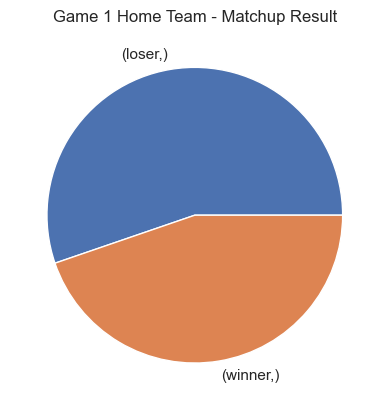

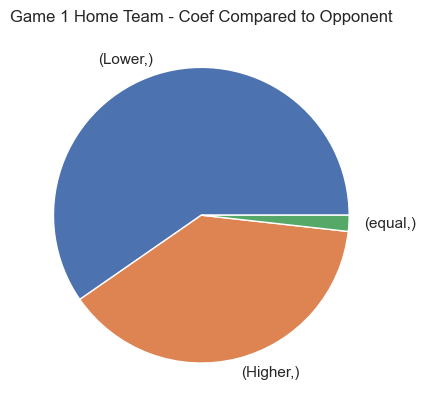

High scoring Gm1, Gm1 Home team loses matchup 13 15
High scoring Gm1, Gm1 Home team loses or wins matchup, closer matchups 6 5
Teams are closely matched, winner or loser of matchup 26 29
Gm1 home team coef is greater, winner or loser of matchup 26 18
Gm1 home team coef is greater, close matchup, winner or loser of matchup 13 8
High scoring Gm1, Gm1 Home team wins Gm1, Gm1 Home team loses or wins matchup 5 1


In [59]:
# Who plays at home first in the quarters and semis are completely random - r16 is less random, and typically the worse team plays at home first
quarters_semis = m[m.rnd.isin(['quarters', 'semis'])]
custom_combos(quarters_semis)


In [60]:
# Percent of the time that the home team for game 1 has a lower coef than the away team
gm1_hteam_loss = 44

In [61]:
np.random.seed(1234)
random_matchups = np.random.binomial(n=114, p=.5, size=1000)
np.sum(random_matchups < gm1_hteam_loss) / len(random_matchups)

0.008

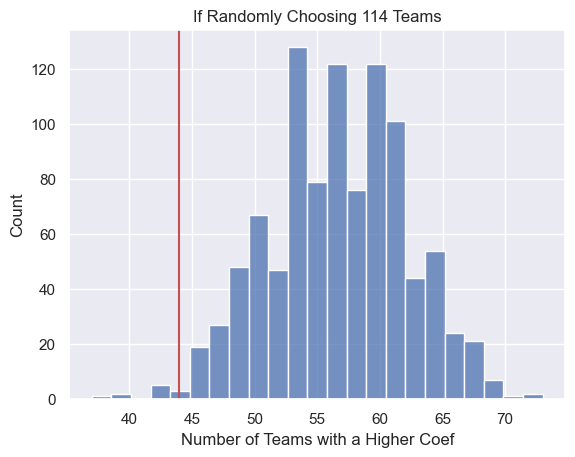

In [62]:
sns.histplot(data=random_matchups)
plt.axvline(gm1_hteam_loss, color='r')
plt.xlabel('Number of Teams with a Higher Coef')
plt.title('If Randomly Choosing 114 Teams')
plt.show()

In [63]:
def more_combos(df: pd.DataFrame, game: int):

    
    close_gm1 = abs(df.h_score_g1 - df.a_score_g1) < 2
    close_gm2 = abs(df.h_score_g2 - df.a_score_g2) < 2
    high_scoring_gm1 = df.goalstotal_g1 > 3
    high_scoring_gm2 = df.goalstotal_g2 > 3

    # I decided to change unevan scoring, becuase the commented one is probably too strict
    # uneven_scoring = abs(df.goalstotal_g1 - df.goalstotal_g2) > 3
    uneven_scoring = high_scoring_gm1 ^ high_scoring_gm2

    if game == 1:
        print('Close Gm1')
        print(df[close_gm1]['win_cond'].value_counts())

        print('Close Gm1 + gm1 home team win/lose')
        print('wins')
        print(df[close_gm1 & (df.h_team_g1 != df.loser)]['win_cond'].value_counts())
        print('losses')
        print(df[close_gm1 & (df.h_team_g1 == df.loser)]['win_cond'].value_counts())

        print('Gm1 High Scoring + gm1 home team win/lose')
        print('wins')
        print(df[high_scoring_gm1 & (df.h_team_g1 == df.winner)]['win_cond'].value_counts())
        print('losses')
        print(df[high_scoring_gm1 & (df.h_team_g1 == df.loser)]['win_cond'].value_counts())

        print('Close Gm1 + Gm1 High Scoring + gm1 home team win/lose')
        print('wins')
        print(df[close_gm1 & high_scoring_gm1 & (df.h_team_g1 == df.winner)]['win_cond'].value_counts())
        print('losses')
        print(df[close_gm1 & high_scoring_gm1 & (df.h_team_g1 == df.loser)]['win_cond'].value_counts())

        print('Close Gm1 + Gm1 High Scoring + Uneven scoring')
        print(df[close_gm1 & high_scoring_gm1 & uneven_scoring]['win_cond'].value_counts())

        print('Close Gm1 + Uneven scoring + Gm1 High scoring + gm1 home team win/lose')
        print('wins')
        print(df[close_gm1 & uneven_scoring & high_scoring_gm1 & (df.h_team_g1 == df.winner)]['win_cond'].value_counts())
        print('losses')
        print(df[close_gm1 & uneven_scoring & high_scoring_gm1 & (df.h_team_g1 == df.loser)]['win_cond'].value_counts())

        print('Close Gm1 + Uneven scoring + Gm1 High scoring + gm1 home team coef higher/lower')
        print('higher')
        print(df[close_gm1 & uneven_scoring & high_scoring_gm1 & (df.h_coef_g1 > df.a_coef_g1)]['win_cond'].value_counts())
        print('equal')
        print(df[close_gm1 & uneven_scoring & high_scoring_gm1 & (df.h_coef_g1 == df.a_coef_g1)]['win_cond'].value_counts())
        print('lower')
        print(df[close_gm1 & uneven_scoring & high_scoring_gm1 & (df.h_coef_g1 < df.a_coef_g1)]['win_cond'].value_counts())

        print('gm1 home team win/lose')
        print('wins')
        print(df[(df.h_team_g1 == df.winner)]['win_cond'].value_counts())
        print('losses')
        print(df[(df.h_team_g1 == df.loser)]['win_cond'].value_counts())

        print('gm1 home team coef higher/lower')
        print('higher')
        print(df[(df.h_coef_g1 > df.a_coef_g1)]['win_cond'].value_counts())
        print('equal')
        print(df[(df.h_coef_g1 == df.a_coef_g1)]['win_cond'].value_counts())
        print('lower')
        print(df[(df.h_coef_g1 < df.a_coef_g1)]['win_cond'].value_counts())

        print('gm1 home team win/lose')
        print('wins')
        print(df[(df.h_team_g1 == df.winner)]['win_cond'].value_counts())
        print('losses')
        print(df[(df.h_team_g1 == df.loser)]['win_cond'].value_counts())

        print('gm1 home team coef win+higher/lose+lower')
        print('higher')
        print(df[(df.h_team_g1 == df.winner) & (df.h_coef_g1 > df.a_coef_g1)]['win_cond'].value_counts())

        print('lower')
        print(df[(df.h_team_g1 == df.loser) & (df.h_coef_g1 < df.a_coef_g1)]['win_cond'].value_counts())






    if game == 2:

        print('Gm2 High Scoring')
        print(df[high_scoring_gm2 & (df.h_team_g2 == df.loser)]['win_cond'].value_counts())

        print('Close Gm2 + Gm2 High Scoring')
        print(df[close_gm2 & high_scoring_gm2 & (df.h_team_g2 == df.loser)]['win_cond'].value_counts())
        # print(df[close_gm2 & high_scoring_gm2 & (df.h_team_g2 == df.loser)]['win_cond'].value_counts(normalize=True))

        print('Close Gm2 + Gm2 High Scoring + Uneven scoring')
        print(df[close_gm2 & high_scoring_gm2 & uneven_scoring]['win_cond'].value_counts())
        # print(df[close_gm2 & high_scoring_gm2 & uneven_scoring]['win_cond'].value_counts(normalize=True))

        print('Close Gm2 + Uneven scoring + Gm2 High scoring + Gm2 Home Team loser')
        print('wins')
        print(df[close_gm2 & uneven_scoring & high_scoring_gm2 & (df.h_team_g2 == df.winner)]['win_cond'].value_counts())
        print('losses')
        print(df[close_gm2 & uneven_scoring & high_scoring_gm2 & (df.h_team_g2 == df.loser)]['win_cond'].value_counts())
        # print(df[close_gm2 & uneven_scoring & high_scoring_gm2 & (df.h_team_g2 == df.loser)]['win_cond'].value_counts(normalize=True))

        print('Close Gm2 + Uneven scoring + Gm2 High scoring + gm2 home team coef higher/lower')
        print('higher')
        print(df[close_gm2 & uneven_scoring & high_scoring_gm2 & (df.h_coef_g1 < df.a_coef_g1)]['win_cond'].value_counts())
        print('lower')
        print(df[close_gm2 & uneven_scoring & high_scoring_gm2 & (df.h_coef_g1 > df.a_coef_g1)]['win_cond'].value_counts())


In [77]:
def gm1close_uneven_gm1high(df):    
    close_gm1 = abs(df.h_score_g1 - df.a_score_g1) < 2
    close_gm2 = abs(df.h_score_g2 - df.a_score_g2) < 2
    high_scoring_gm1 = df.goalstotal_g1 > 3
    high_scoring_gm2 = df.goalstotal_g2 > 3
    uneven_scoring = high_scoring_gm1 ^ high_scoring_gm2

    
    df['g1_home_winner'] = np.where((df.h_team_g1 == df.winner), 'winner', 'loser')

    _ = df[close_gm1 & uneven_scoring & high_scoring_gm1]
    sns.countplot(x='g1_home_winner', order=['winner', 'loser'], data=_)
    plt.ylim([0,18])
    plt.title('Close Gm1 + Uneven scoring + Gm1 High scoring + gm1 home team win/lose')
    plt.show()

    sns.countplot(x='g1_home_winner', hue='win_cond', order=['winner', 'loser'], data=_)
    plt.ylim([0,18])
    plt.title('Close Gm1 + Uneven scoring + Gm1 High scoring + gm1 home team win/lose')
    plt.show()

    df['g1_home_higher'] = np.where((df.h_coef_g1 > df.a_coef_g1), 'higher', 'lower')
    _ = df[close_gm1 & uneven_scoring & high_scoring_gm1]
    sns.countplot(x='g1_home_higher', order=['higher', 'lower'], data=_)
    plt.ylim([0,18])
    plt.title('Close Gm1 + Uneven scoring + Gm1 High scoring + gm1 home team coef higher/lower')
    plt.show()

    _ = df[close_gm1 & uneven_scoring & high_scoring_gm1]
    sns.countplot(x='g1_home_higher', hue='win_cond', order=['higher', 'lower'], data=_)
    plt.ylim([0,18])
    plt.title('Close Gm1 + Uneven scoring + Gm1 High scoring + gm1 home team coef higher/lower')
    plt.show()

    # print('Close Gm1 + Uneven scoring + Gm1 High scoring + gm1 home team coef higher/lower')
    # print('higher')
    # print(df[close_gm1 & uneven_scoring & high_scoring_gm1 & (df.h_coef_g1 > df.a_coef_g1)]['win_cond'].value_counts())
    # print('equal')
    # print(df[close_gm1 & uneven_scoring & high_scoring_gm1 & (df.h_coef_g1 == df.a_coef_g1)]['win_cond'].value_counts())
    # print('lower')
    # print(df[close_gm1 & uneven_scoring & high_scoring_gm1 & (df.h_coef_g1 < df.a_coef_g1)]['win_cond'].value_counts())

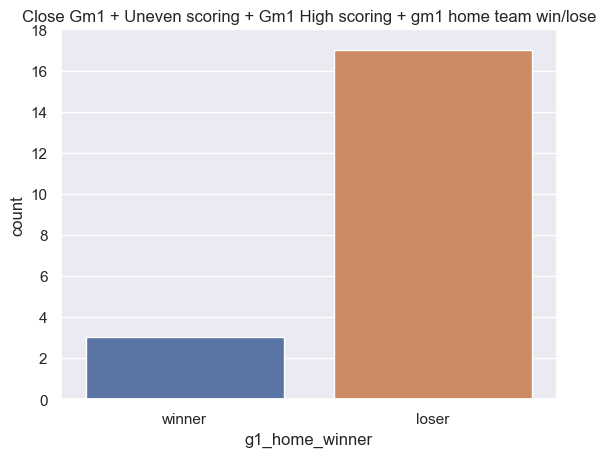

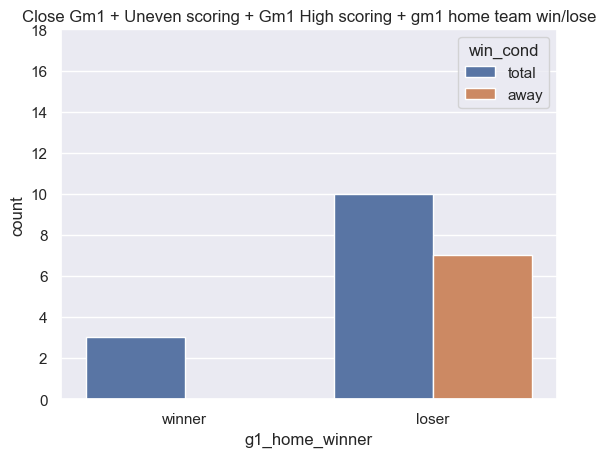

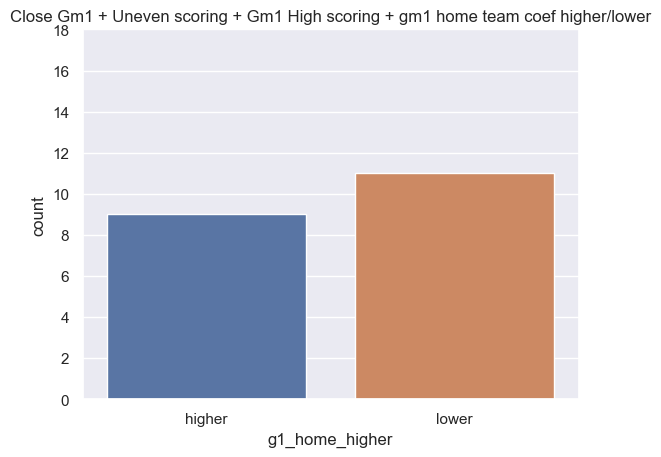

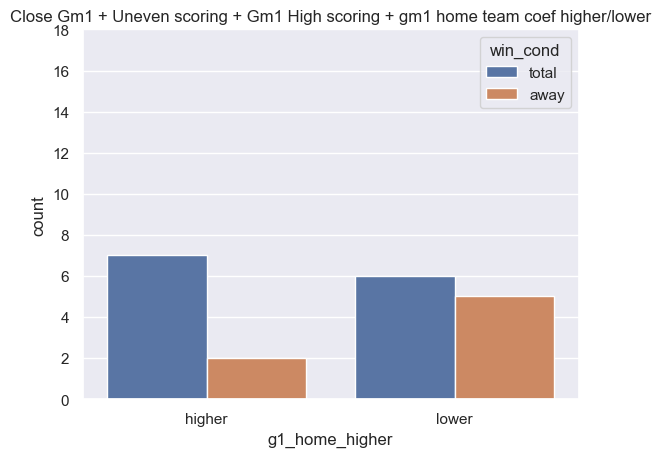

In [78]:
gm1close_uneven_gm1high(m)

In [66]:
m['g1_home_winner'] = np.where((m.h_team_g1 == m.winner), 'winner', 'loser')

In [67]:
more_combos(m, 1)

Close Gm1
total    135
away      25
pens       9
Name: win_cond, dtype: int64
Close Gm1 + gm1 home team win/lose
wins
total    42
away     12
pens      4
Name: win_cond, dtype: int64
losses
total    93
away     13
pens      5
Name: win_cond, dtype: int64
Gm1 High Scoring + gm1 home team win/lose
wins
total    22
pens      1
Name: win_cond, dtype: int64
losses
total    31
away     13
Name: win_cond, dtype: int64
Close Gm1 + Gm1 High Scoring + gm1 home team win/lose
wins
total    3
pens     1
Name: win_cond, dtype: int64
losses
total    15
away      7
Name: win_cond, dtype: int64
Close Gm1 + Gm1 High Scoring + Uneven scoring
total    13
away      7
Name: win_cond, dtype: int64
Close Gm1 + Uneven scoring + Gm1 High scoring + gm1 home team win/lose
wins
total    3
Name: win_cond, dtype: int64
losses
total    10
away      7
Name: win_cond, dtype: int64
Close Gm1 + Uneven scoring + Gm1 High scoring + gm1 home team coef higher/lower
higher
total    7
away     2
Name: win_cond, dtype: int64
eq

In [68]:
more_combos(m, 2)

Gm2 High Scoring
total    23
away      8
pens      1
Name: win_cond, dtype: int64
Close Gm2 + Gm2 High Scoring
total    12
away      6
pens      1
Name: win_cond, dtype: int64
Close Gm2 + Gm2 High Scoring + Uneven scoring
total    14
away      6
Name: win_cond, dtype: int64
Close Gm2 + Uneven scoring + Gm2 High scoring + Gm2 Home Team loser
wins
total    6
Name: win_cond, dtype: int64
losses
total    8
away     6
Name: win_cond, dtype: int64
Close Gm2 + Uneven scoring + Gm2 High scoring + gm2 home team coef higher/lower
higher
total    6
away     4
Name: win_cond, dtype: int64
lower
total    8
away     2
Name: win_cond, dtype: int64


In [70]:
m['g1_home_winner'] = np.where((m.h_team_g1 == m.winner), 'winner', 'loser')
m['g2_home_winner'] = np.where((m.h_team_g2 == m.winner), 'winner', 'loser')

In [71]:
m[(m.h_coef_g1 > m.a_coef_g1)][['g1_home_winner', 'win_cond']].value_counts()


g1_home_winner  win_cond
winner          total       39
loser           total       35
                away        10
winner          away         3
loser           pens         2
winner          pens         2
dtype: int64

In [72]:
m[(m.h_coef_g1 < m.a_coef_g1)][['g2_home_winner', 'win_cond']].value_counts()

g2_home_winner  win_cond
winner          total       98
loser           total       34
                away        11
winner          away         9
                pens         3
loser           pens         2
dtype: int64

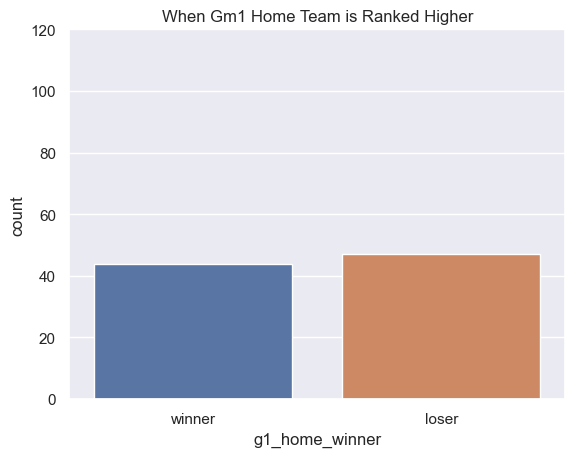

In [73]:
_ = m[(m.h_coef_g1 > m.a_coef_g1)]
sns.countplot(x='g1_home_winner', order=['winner', 'loser'], data=_)
plt.ylim([0,120])
plt.title('When Gm1 Home Team is Ranked Higher')
plt.show()

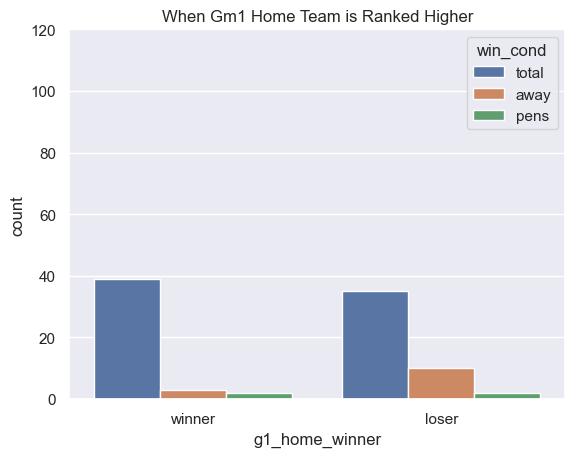

In [74]:
_ = m[(m.h_coef_g1 > m.a_coef_g1)]
sns.countplot(x='g1_home_winner', order=['winner', 'loser'], hue='win_cond', data=_)
plt.ylim([0,120])
plt.title('When Gm1 Home Team is Ranked Higher')
plt.show()

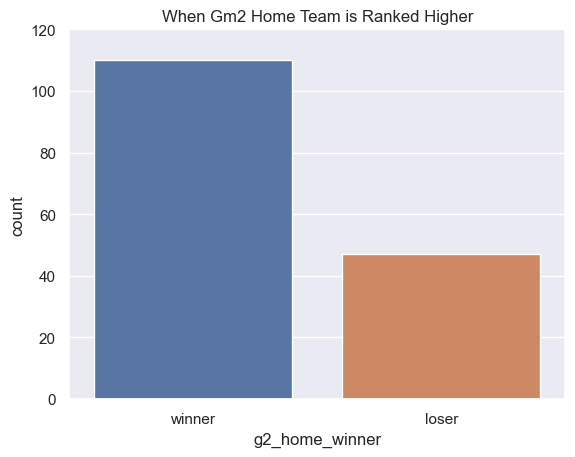

In [75]:
_ = m[(m.h_coef_g1 < m.a_coef_g1)]
sns.countplot(x='g2_home_winner', data=_)
plt.ylim([0,120])
plt.title('When Gm2 Home Team is Ranked Higher')
plt.show()

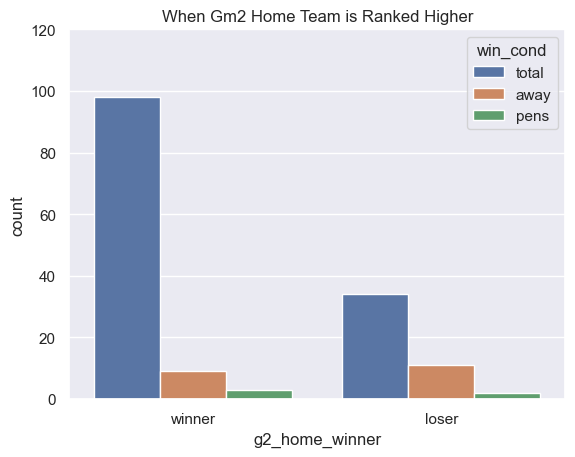

In [76]:
_ = m[(m.h_coef_g1 < m.a_coef_g1)]
sns.countplot(x='g2_home_winner', hue='win_cond', data=_)
plt.ylim([0,120])
plt.title('When Gm2 Home Team is Ranked Higher')
plt.show()